# DENOISING IMAGES with AUTOENCODERS

## AUTOENCODERS

An autoencoder is a neural network that learns to copy its input to its output. It has an internal (hidden) layer that describes a code used to represent the input, and it is constituted by two main parts: an encoder that maps the input into the code, and a decoder that maps the code to a reconstruction of the input.

Performing the copying task perfectly would simply duplicate the signal, and this is why autoencoders usually are restricted in ways that force them to reconstruct the input approximately, preserving only the most relevant aspects of the data in the copy.

The idea of autoencoders has been popular in the field of neural networks for decades.

![image.png](https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_denoising_autoencoder_overview.png)

## GOAL

![image.png](https://www.tensorflow.org/tutorials/generative/images/image_denoise_fmnist_results.png)

## Import Data & Libraries

In [ ]:
!nvidia-smi

Fri Mar 19 12:17:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


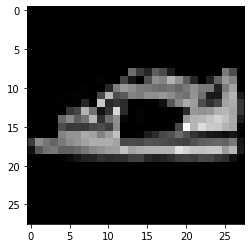

In [ ]:
plt.imshow(x_train[13], cmap=plt.cm.gray)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

## Data Visualization

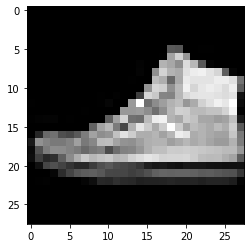

In [ ]:
i = random.randint(1,len(x_train))
plt.imshow(x_train[i] , cmap = 'gray')

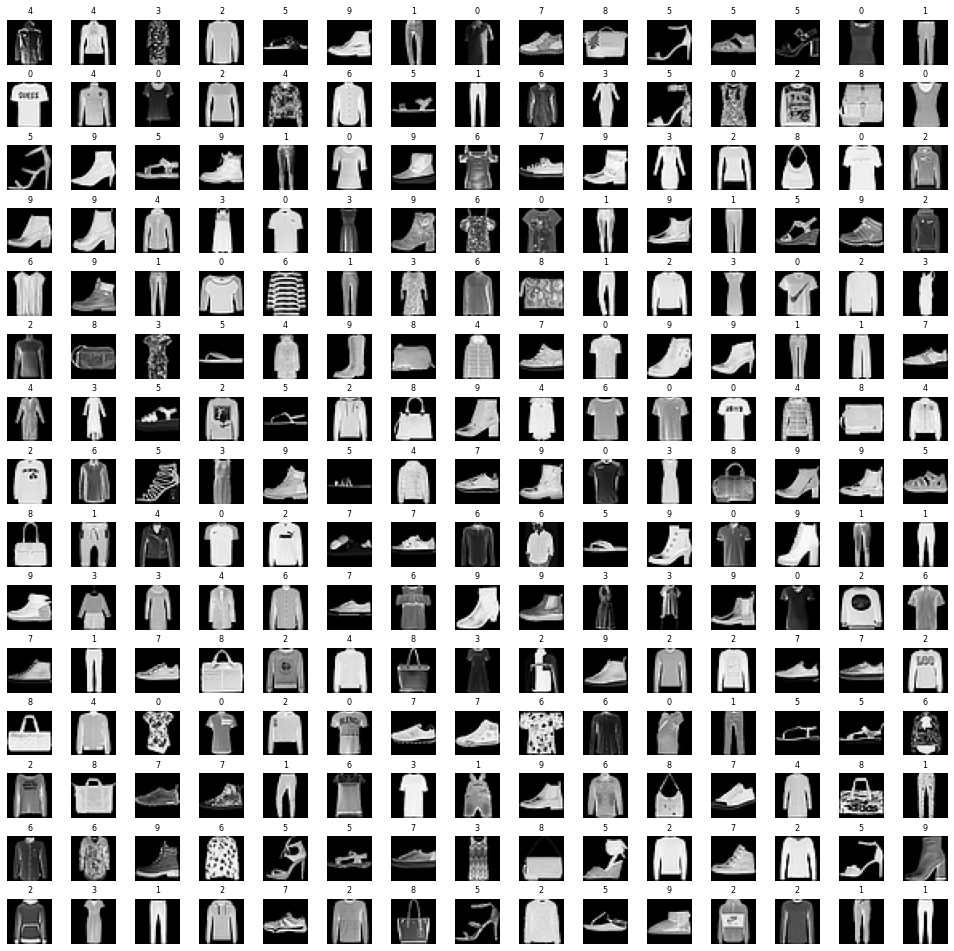

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flatten

n_training = len(x_train) # length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index], cmap = plt.cm.gray)
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Data Preprocessing

In [ ]:
x_train, x_test = x_train / 255.0,  x_test / 255.0

In [ ]:
noise_factor = 0.2

noise_dataset = []

for images in x_train:
  noisy_image = images + noise_factor * np.random.randn(*images.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [ ]:
noise_dataset = np.array(noise_dataset)

In [ ]:
noise_dataset.shape

(60000, 28, 28)

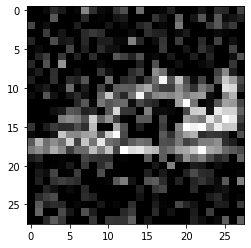

In [ ]:
plt.imshow(noise_dataset[13], cmap=plt.cm.gray)

In [ ]:
noise_test_set = []
for images in x_test:
  noisy_image = images + noise_factor * np.random.randn(*images.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 28, 28)

## Build and Train the Autoencoder

In [ ]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", activation='relu'))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same",activation='relu'))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding="same", activation='relu'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        9280      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         577       
Total params: 17,121
Trainable params: 17,121
Non-trainable params: 0
_________________________________________________________________


* Last layer's shape would be equal to the input shape --> (28,28,1)

In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1), # add batch dims          
                x_train.reshape(-1, 28, 28, 1), 
                epochs=16, 
                batch_size=128, 
                validation_data=(noise_test_set.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/16
469/469 [==============================] - 36s 7ms/step - loss: 0.4055 - val_loss: 0.2846
Epoch 2/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2799 - val_loss: 0.2764
Epoch 3/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2730 - val_loss: 0.2733
Epoch 4/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2704 - val_loss: 0.2712
Epoch 5/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2688 - val_loss: 0.2698
Epoch 6/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2675 - val_loss: 0.2689
Epoch 7/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2667 - val_loss: 0.2683
Epoch 8/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2656 - val_loss: 0.2679
Epoch 9/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2655 - val_loss: 0.2676
Epoch 10/16
469/469 [==============================] - 3s 5ms/step - loss: 0.2650 - val_loss: 0.267

## Evaluate the Model

In [ ]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
evaluation

313/313 [==============================] - 1s 2ms/step - loss: 0.2659


0.26585566997528076

In [ ]:
predicted = autoencoder.predict(noise_test_set[:15].reshape(-1, 28, 28, 1))

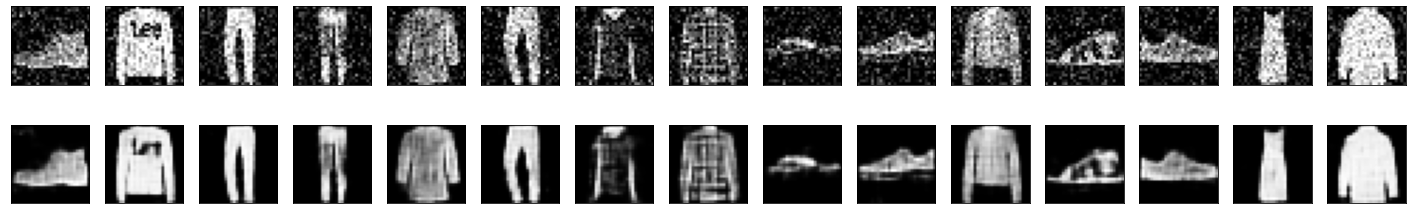

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=15, sharex=True, sharey=True, figsize=(25,4))
for images, row in zip([noise_test_set[:15], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap=plt.cm.gray)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)